<a href="https://colab.research.google.com/github/NathanHoang02/ClassAssignment/blob/main/Practice2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im = np.array(Image.open('lena.png'))

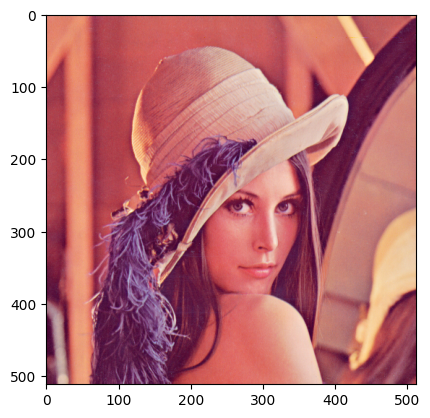

In [20]:
plt.imshow(im)

In [3]:
print(im.shape, im.dtype)

(512, 512, 3) uint8


In [4]:
def plot_imgs(L_img, n_row, n_col):
    plt.figure()
    for i in range(n_row):
        for j in range(n_col):
            plt.subplot(n_row, n_col, i * n_col + j + 1)
            plt.imshow(L_img[i * n_col + j])
            plt.axis('off')
    plt.show()

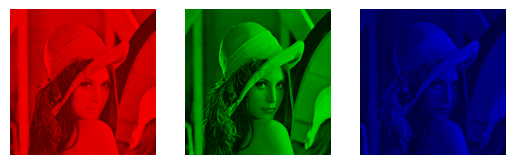

In [5]:
im_R = im.copy()
im_R[:, :, (1, 2)] = 0
im_G = im.copy()
im_G[:, :, (0, 2)] = 0
im_B = im.copy()
im_B[:, :, (0, 1)] = 0
plot_imgs([im_R, im_G, im_B], 1, 3)

-------------------------------

#Implement an image manipulation library that provides the following functions. Only use Python and NumPy. No other packages are allowed. In addition, you CANNOT use Python loop in any of the functions.

<br>

## 1. function "split_image(img, n)"

Given an image (img) and an integer number (n), split the image into $2^n \times 2^n$ patchs. Return the patches as a Python list, following a left to right and top to bottom order. For example if n=1 and the image is split the following way:

p0, p1

p2, p3

The list you return should be [p0, p1, p2, p3]

<br>

## 2. function "stich_images(L_img)"

Given a list of image patchs (L_img), stich the images in the list into a single image and return the resulting image. This is the reverse of the above function. Therefore, the layout of the patchs in the final image should be left to right and top to bottom.

<br>

## 3. function "to_mosiac(img)"

Implement a function that uses the functions in 1 and 2 to turn a image into a random mosaic.

<br>

## 4. function "mask_image(img, x, y, d)"

Given an image (img) and 3 integers (x, y, d) which specific a region with four corners: (x, y), (x+d, y), (x, y+d), (x+d, y+d) on the image, turn this region to black. Return a pair (image, patch) where image is the modified image and patch is the part on the original image inside that region.

<br>

## 5. function "border_image(img)"

Given an image (img), frame the image with a border of 5 pixels. The color of the border should be green. Return the new image with the border.

<br>

## 6. function "switch_pixels(img1, img2)"

img1, img2 are two images of the same size. Replace the green pixels (pixel color values are [0, 255, 0]) in img1 with the corresponding pixels from img2.







In [13]:
def split_image(img, n):
  height, width, _ = img.shape # Assign the third value to _ which is a placeholder variable that you won't be using
  patch_height = height // (2 ** n)
  patch_width = width // (2 ** n)
  L_img = []
  for i in range(2 ** n):
    for j in range(2 ** n):
      patch = img[i * patch_height:(i + 1) * patch_height,
                  j * patch_width:(j + 1) * patch_width, :]
      L_img.append(patch)
  return L_img

In [7]:
def stich_images(L_img):
  if not L_img:
    return None

  h, w, c = L_img[0].shape
  n = int(len(L_img)**0.5)
  result = np.zeros((h * n, w * n, c), dtype=np.uint8)

  for i in range(n):
    for j in range(n):
      result[i * h:(i + 1) * h, j * w:(j + 1) * w, :] = L_img[i * n + j]
  return result

In [8]:
def to_mosiac(img):
  L_img = split_image(img, 4)
  np.random.shuffle(L_img)
  return stich_images(L_img)

In [9]:
def mask_image(img, x, y, d):
  h, w, c = img.shape
  patch = img[y:y+d, x:x+d].copy()
  img[y:y+d, x:x+d] = 0
  return img # Return only the modified image

In [10]:
def border_image(im):
    h, w, c = im.shape
    border_size = 5
    new_h = h + 2 * border_size
    new_w = w + 2 * border_size
    new_img_array = np.zeros((new_h, new_w, c), dtype=np.uint8)
    new_img_array[:, :] = [0, 255, 0]
    new_img_array[border_size:border_size+h, border_size:border_size+w] = im
    new_img = Image.fromarray(new_img_array)
    return new_img

In [11]:
def switch_pixels(img1, img2):
  for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
      # Use np.array_equal to compare arrays element-wise
      if np.array_equal(img1[i, j], [0, 255, 0]):
        img1[i, j] = img2[i, j]
  return img1

## Example code to test your library

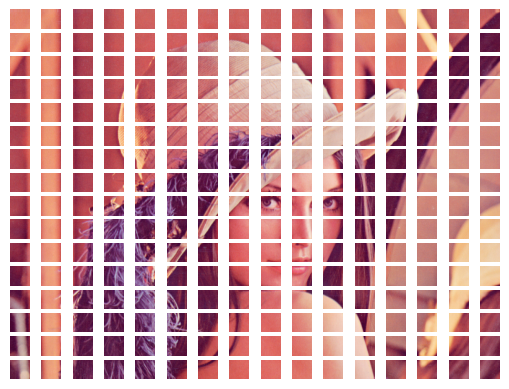

In [14]:
L = split_image(im.copy(), 4)
plot_imgs(L, 16 ,16)

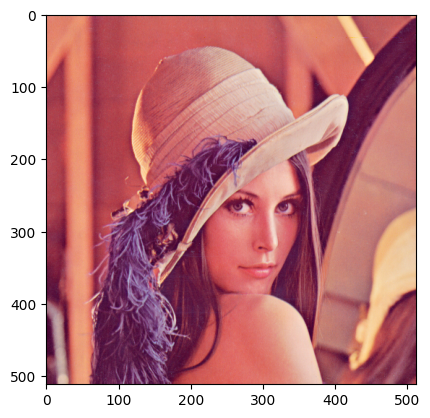

In [15]:
plt.imshow(stich_images(L))

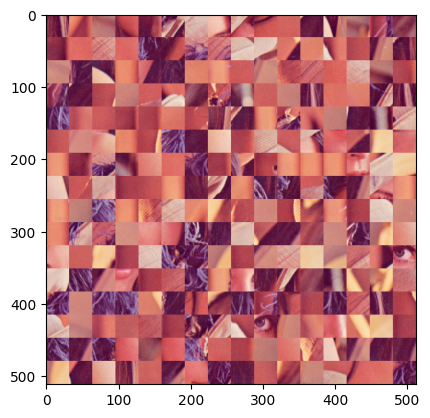

In [16]:
plt.imshow(to_mosiac(im.copy()))

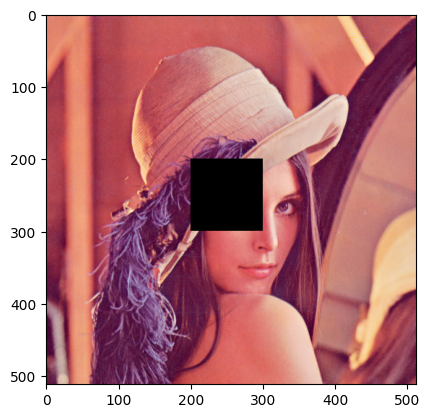

In [17]:
plt.imshow(mask_image(im.copy(), 200, 200, 100))

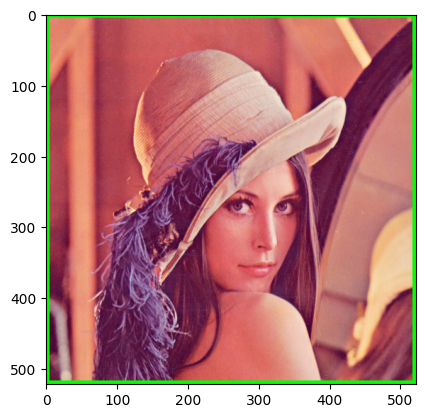

In [18]:
plt.imshow(border_image(im.copy()))

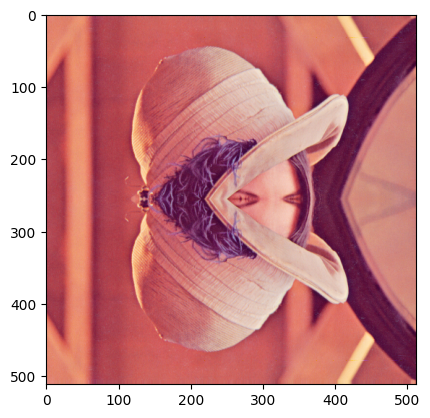

In [19]:
m1 = im.copy()
m1[256:, :, :] = (0, 255, 0)
m2 = im.copy()[::-1, :, :]
plt.imshow(switch_pixels(m1, m2))